In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model

In [4]:
df = pd.read_csv("diabetes_binary_health_indicators_BRFSS2015.csv")
df.head()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [7]:
# Step 1: Data Preprocessing
# Check for nulls and data types
missing_values = df.isnull().sum()
missing_values

Diabetes_binary         0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64

In [9]:
d_types = df.dtypes
d_types

Diabetes_binary         float64
HighBP                  float64
HighChol                float64
CholCheck               float64
BMI                     float64
Smoker                  float64
Stroke                  float64
HeartDiseaseorAttack    float64
PhysActivity            float64
Fruits                  float64
Veggies                 float64
HvyAlcoholConsump       float64
AnyHealthcare           float64
NoDocbcCost             float64
GenHlth                 float64
MentHlth                float64
PhysHlth                float64
DiffWalk                float64
Sex                     float64
Age                     float64
Education               float64
Income                  float64
dtype: object

In [11]:
#Check duplicate rows
duplicate_c = df.duplicated().sum()

In [13]:
duplicate_c 

24206

In [15]:
df

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253675,0.0,1.0,1.0,1.0,45.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,5.0,0.0,1.0,5.0,6.0,7.0
253676,1.0,1.0,1.0,1.0,18.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,4.0,0.0,0.0,1.0,0.0,11.0,2.0,4.0
253677,0.0,0.0,0.0,1.0,28.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,5.0,2.0
253678,0.0,1.0,0.0,1.0,23.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,7.0,5.0,1.0


In [17]:
feature_names = df.drop("Diabetes_binary", axis=1).columns.tolist()
print(feature_names)

['HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker', 'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth', 'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education', 'Income']


In [19]:
X = df.drop("Diabetes_binary", axis=1)
y = df["Diabetes_binary"]


In [21]:
X,y

(        HighBP  HighChol  CholCheck   BMI  Smoker  Stroke  \
 0          1.0       1.0        1.0  40.0     1.0     0.0   
 1          0.0       0.0        0.0  25.0     1.0     0.0   
 2          1.0       1.0        1.0  28.0     0.0     0.0   
 3          1.0       0.0        1.0  27.0     0.0     0.0   
 4          1.0       1.0        1.0  24.0     0.0     0.0   
 ...        ...       ...        ...   ...     ...     ...   
 253675     1.0       1.0        1.0  45.0     0.0     0.0   
 253676     1.0       1.0        1.0  18.0     0.0     0.0   
 253677     0.0       0.0        1.0  28.0     0.0     0.0   
 253678     1.0       0.0        1.0  23.0     0.0     0.0   
 253679     1.0       1.0        1.0  25.0     0.0     0.0   
 
         HeartDiseaseorAttack  PhysActivity  Fruits  Veggies  ...  \
 0                        0.0           0.0     0.0      1.0  ...   
 1                        0.0           1.0     0.0      0.0  ...   
 2                        0.0           0.0    

In [23]:
X.head()

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_binary       253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   HeartDiseaseorAttack  253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

In [27]:
#duplicates value remove
df = df.drop_duplicates()
X = df.drop("Diabetes_binary", axis=1)
y = df["Diabetes_binary"]


In [29]:
X,y

(        HighBP  HighChol  CholCheck   BMI  Smoker  Stroke  \
 0          1.0       1.0        1.0  40.0     1.0     0.0   
 1          0.0       0.0        0.0  25.0     1.0     0.0   
 2          1.0       1.0        1.0  28.0     0.0     0.0   
 3          1.0       0.0        1.0  27.0     0.0     0.0   
 4          1.0       1.0        1.0  24.0     0.0     0.0   
 ...        ...       ...        ...   ...     ...     ...   
 253675     1.0       1.0        1.0  45.0     0.0     0.0   
 253676     1.0       1.0        1.0  18.0     0.0     0.0   
 253677     0.0       0.0        1.0  28.0     0.0     0.0   
 253678     1.0       0.0        1.0  23.0     0.0     0.0   
 253679     1.0       1.0        1.0  25.0     0.0     0.0   
 
         HeartDiseaseorAttack  PhysActivity  Fruits  Veggies  ...  \
 0                        0.0           0.0     0.0      1.0  ...   
 1                        0.0           1.0     0.0      0.0  ...   
 2                        0.0           0.0    

In [31]:
#Check duplicate rows again
duplicate_c = df.duplicated().sum()
duplicate_c

0

In [33]:
y.value_counts(normalize=True)

Diabetes_binary
0.0    0.847055
1.0    0.152945
Name: proportion, dtype: float64

In [35]:
#See features have <1% variance
low_variance = (X.nunique() / len(X)) < 0.01
print(X.columns[low_variance])  


Index(['HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker', 'Stroke',
       'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income'],
      dtype='object')


In [37]:
#step2: feature analysis
import seaborn as sns

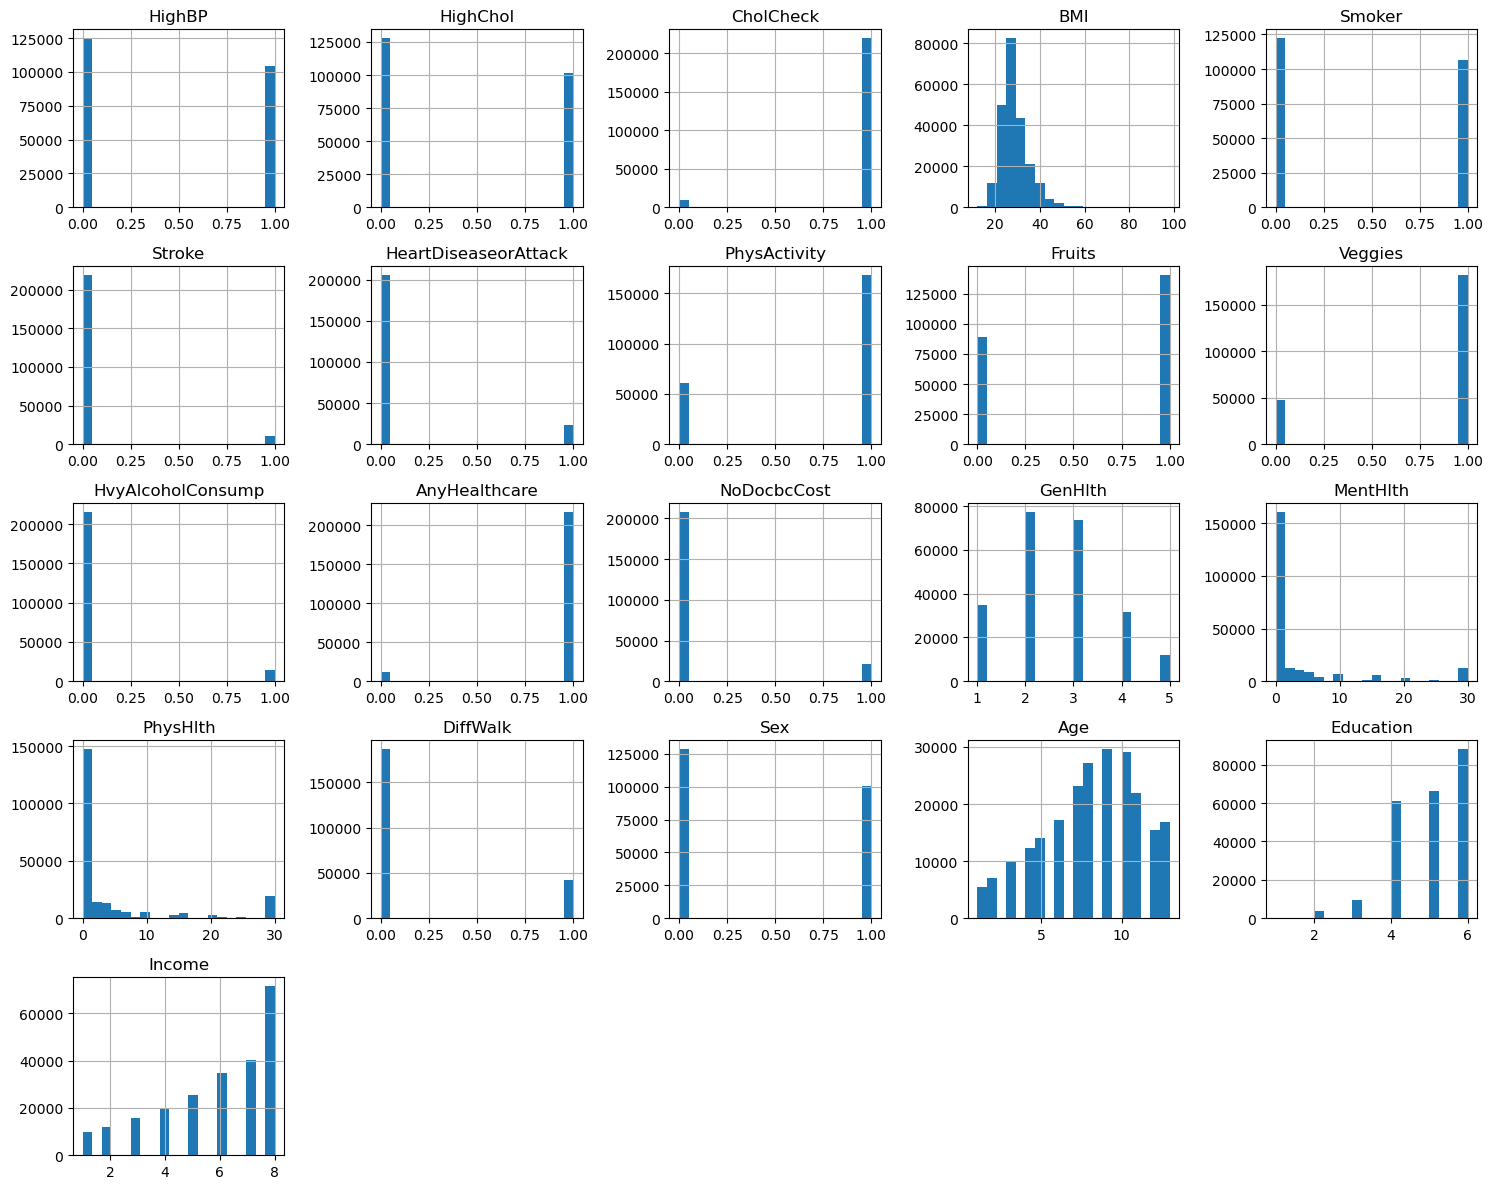

In [39]:
#histograms
X.hist(figsize=(15, 12), bins=20)
plt.tight_layout()
plt.show()

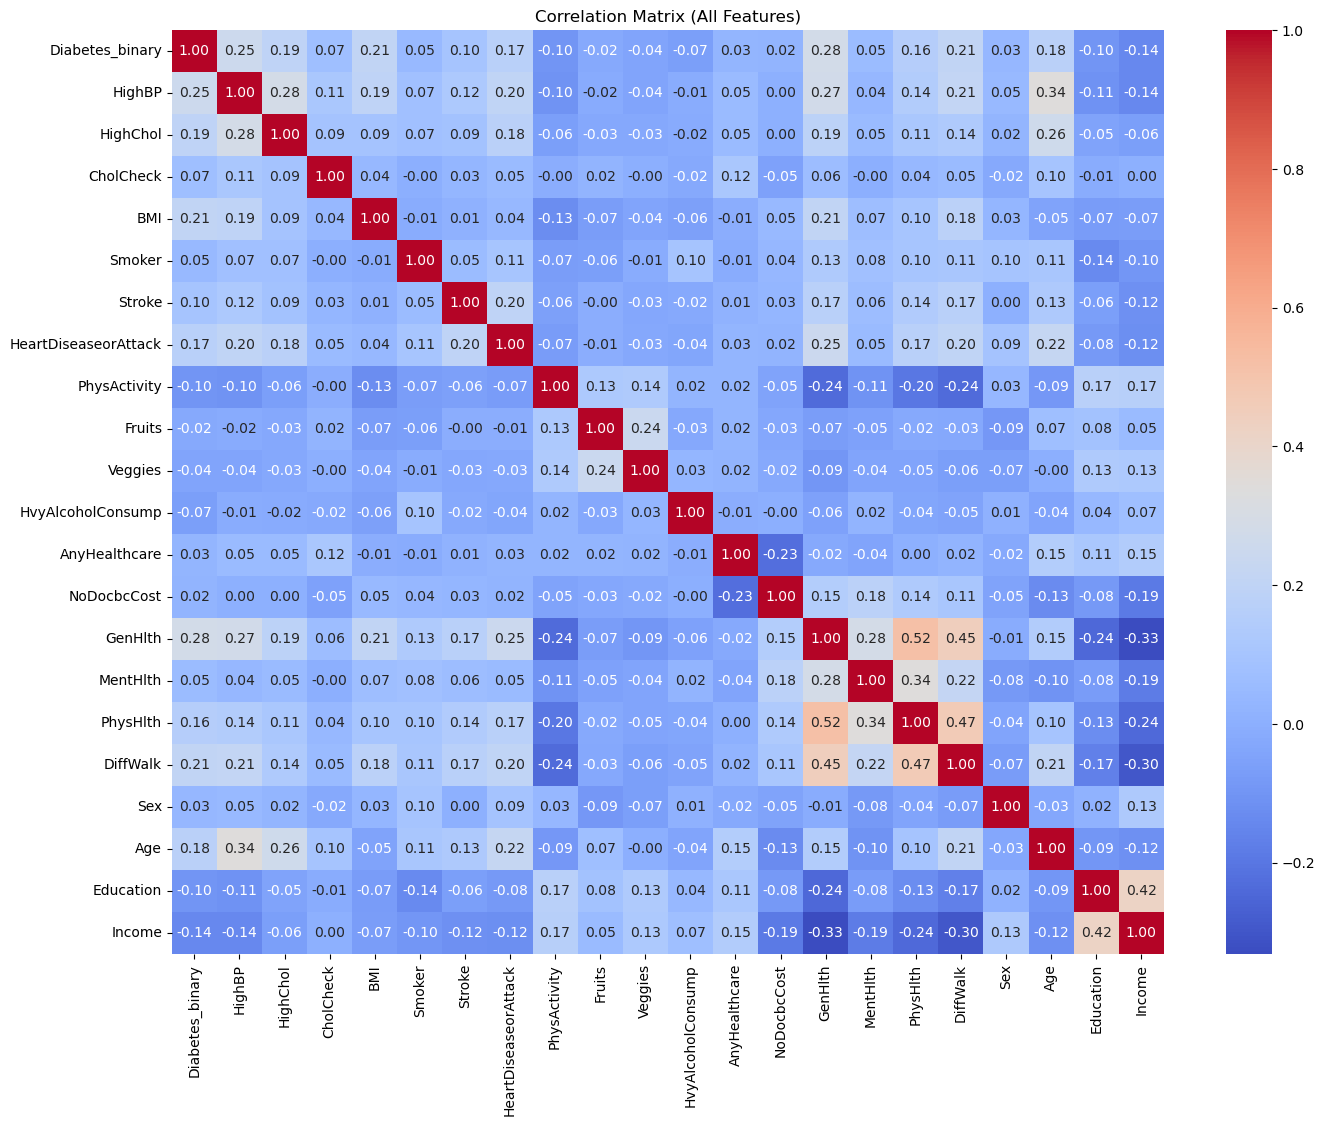

In [40]:
#Correlation Matrix(all features)
plt.figure(figsize=(16, 12))
c_matrix = df.corr(numeric_only=True)
sns.heatmap(c_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Matrix (All Features)")
plt.show()

In [43]:
#Correlation with Target
t_cor = c_matrix["Diabetes_binary"].drop("Diabetes_binary").sort_values(ascending=False)
print("Correlation with Diabetes_binary:\n")
print(t_cor)

Correlation with Diabetes_binary:

GenHlth                 0.276940
HighBP                  0.254318
DiffWalk                0.205302
BMI                     0.205086
HighChol                0.194944
Age                     0.177263
HeartDiseaseorAttack    0.168213
PhysHlth                0.156211
Stroke                  0.099193
CholCheck               0.072523
MentHlth                0.054153
Smoker                  0.045504
Sex                     0.032724
AnyHealthcare           0.025331
NoDocbcCost             0.020048
Fruits                 -0.024805
Veggies                -0.041734
HvyAlcoholConsump      -0.065950
PhysActivity           -0.100404
Education              -0.102686
Income                 -0.140659
Name: Diabetes_binary, dtype: float64


In [45]:
#corr_abs t_cor = c_matrix["Diabetes_binary"].drop("Diabetes_binary").abs().sort_values(ascending=False)
corr_abs =t_cor.abs().sort_values(ascending=False)
#top correlated features
print(corr_abs)

GenHlth                 0.276940
HighBP                  0.254318
DiffWalk                0.205302
BMI                     0.205086
HighChol                0.194944
Age                     0.177263
HeartDiseaseorAttack    0.168213
PhysHlth                0.156211
Income                  0.140659
Education               0.102686
PhysActivity            0.100404
Stroke                  0.099193
CholCheck               0.072523
HvyAlcoholConsump       0.065950
MentHlth                0.054153
Smoker                  0.045504
Veggies                 0.041734
Sex                     0.032724
AnyHealthcare           0.025331
Fruits                  0.024805
NoDocbcCost             0.020048
Name: Diabetes_binary, dtype: float64


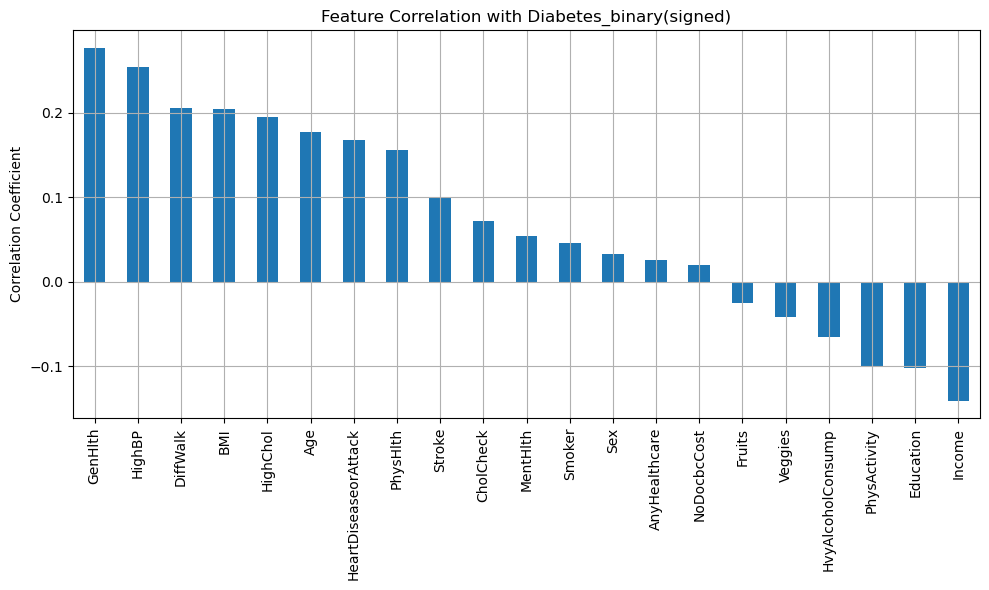

In [47]:
#Visual correlations with target signed
plt.figure(figsize=(10, 6))
t_cor.plot(kind='bar')
plt.title("Feature Correlation with Diabetes_binary(signed)")
plt.ylabel("Correlation Coefficient")
plt.grid(True)
plt.tight_layout()
plt.show()

C:\Users\mdnaj\AppData\Local\Temp\ipykernel_6184\1652439018.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=t_cor.values, y=t_cor.index, palette='coolwarm')


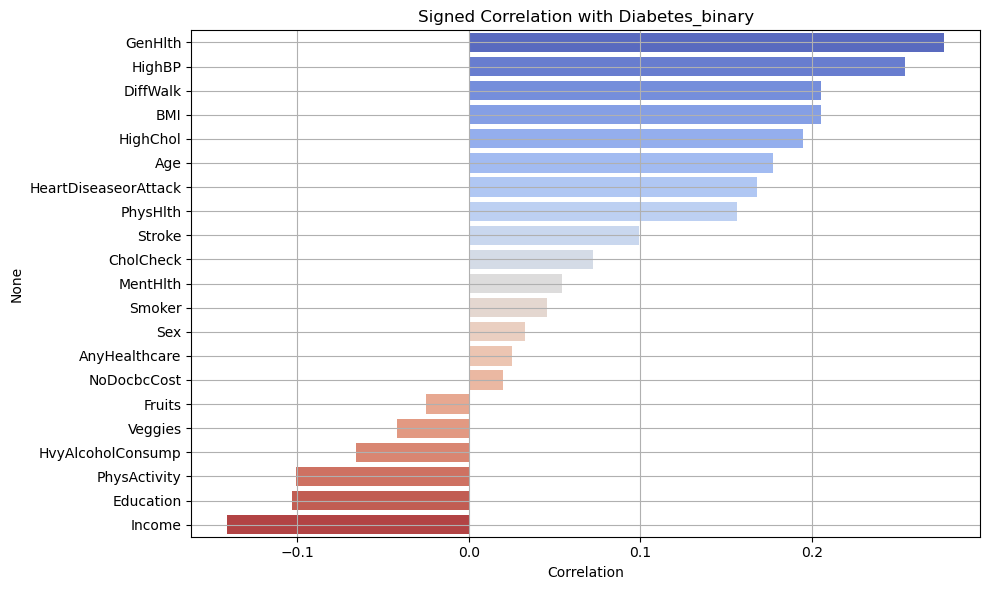

In [49]:
plt.figure(figsize=(10, 6))
sns.barplot(x=t_cor.values, y=t_cor.index, palette='coolwarm')
plt.title("Signed Correlation with Diabetes_binary")
plt.xlabel("Correlation")
plt.grid(True)
plt.tight_layout()
plt.show()

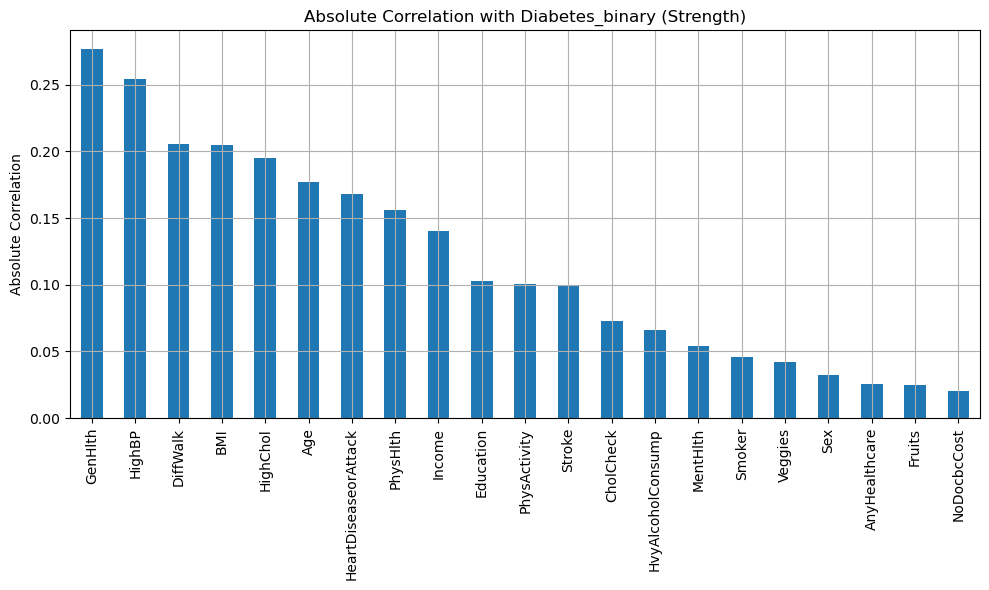

In [51]:
#Visual absolute correlations
plt.figure(figsize=(10, 6))
corr_abs.plot(kind='bar')
plt.title("Absolute Correlation with Diabetes_binary (Strength)")
plt.ylabel("Absolute Correlation")
plt.grid(True)
plt.tight_layout()
plt.show()

C:\Users\mdnaj\AppData\Local\Temp\ipykernel_6184\3379147619.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=corr_abs.values, y=corr_abs.index, palette='Blues_r')


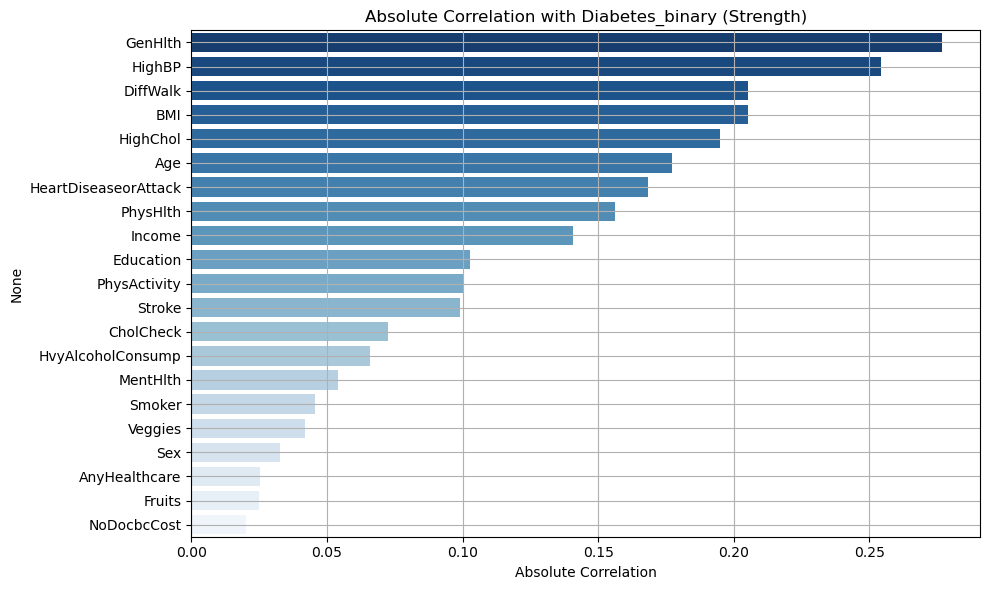

In [53]:
#Visual absolute correlations
plt.figure(figsize=(10, 6))
sns.barplot(x=corr_abs.values, y=corr_abs.index, palette='Blues_r')
plt.title("Absolute Correlation with Diabetes_binary (Strength)")
plt.xlabel("Absolute Correlation")
plt.grid(True)
plt.tight_layout()
plt.show()

In [55]:
#Multicollinearity Check(VIF)
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

X_const = add_constant(X)
vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X_const.values, i+1) for i in range(len(X.columns))]  # i+1 because of const
print(vif_data.sort_values("VIF", ascending=False))


                 Feature       VIF
13               GenHlth  1.716096
15              PhysHlth  1.594297
16              DiffWalk  1.511628
20                Income  1.430313
18                   Age  1.353317
0                 HighBP  1.301200
19             Education  1.272080
14              MentHlth  1.221587
6   HeartDiseaseorAttack  1.167062
1               HighChol  1.158112
12           NoDocbcCost  1.135647
7           PhysActivity  1.130509
3                    BMI  1.121050
11         AnyHealthcare  1.109839
9                Veggies  1.098133
8                 Fruits  1.097947
5                 Stroke  1.077470
4                 Smoker  1.076032
17                   Sex  1.075743
2              CholCheck  1.035274
10     HvyAlcoholConsump  1.026354


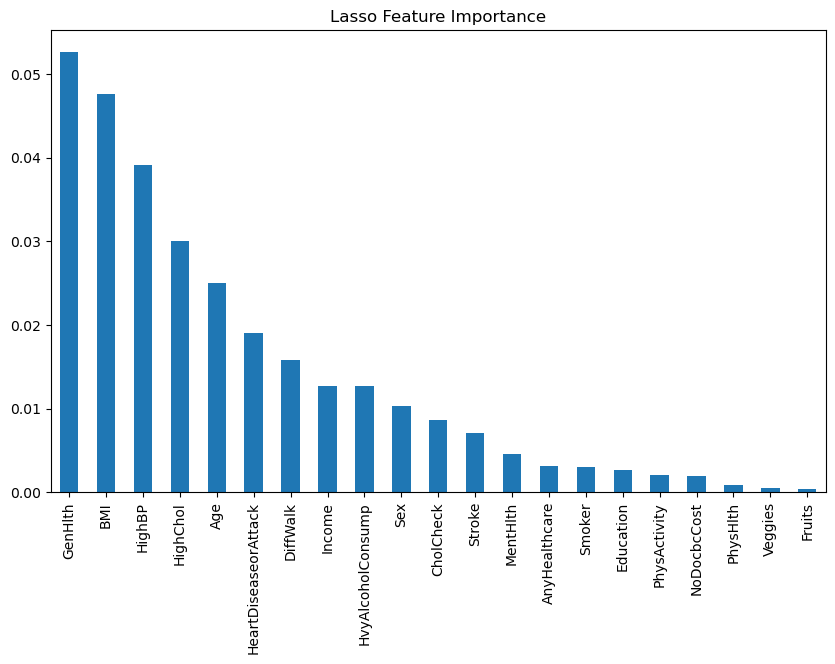

In [57]:
#Feature Importance Using Lasso Regression(Selection)
from sklearn.linear_model import LassoCV
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

lasso = LassoCV(cv=5, random_state=0)
lasso.fit(X_scaled, y)

feature_importance = pd.Series(np.abs(lasso.coef_), index=X.columns)
feature_importance = feature_importance[feature_importance > 0]
feature_importance.sort_values(ascending=False).plot(kind='bar', figsize=(10,6), title="Lasso Feature Importance")
plt.show()


In [59]:
#Recursive Feature Elimination (RFE) with Logistic
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000)
rfe = RFE(model, n_features_to_select=10)
rfe.fit(X_scaled, y)

selected_features = X.columns[rfe.support_]
print("Top Features from RFE:", selected_features.tolist())


Top Features from RFE: ['HighBP', 'HighChol', 'CholCheck', 'BMI', 'HeartDiseaseorAttack', 'HvyAlcoholConsump', 'GenHlth', 'Sex', 'Age', 'Income']


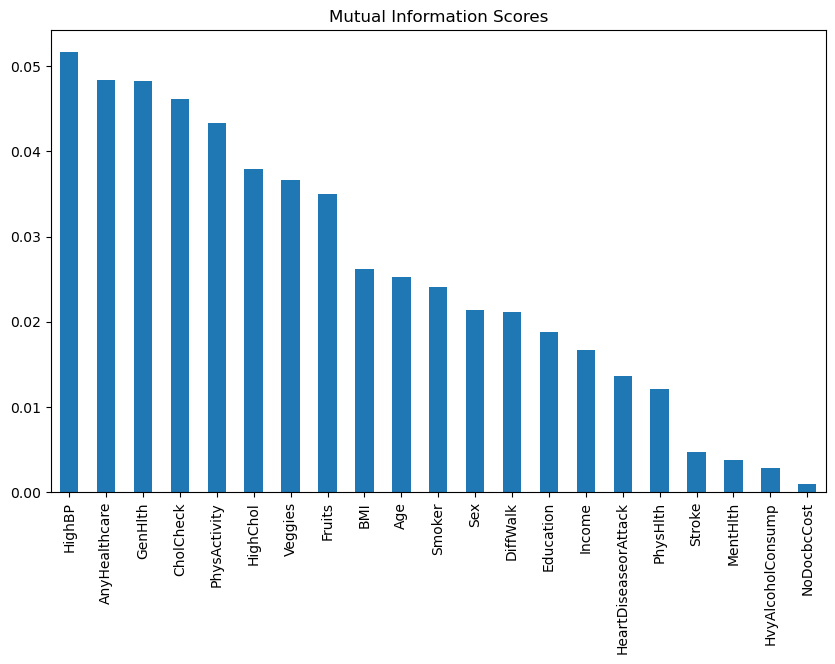

In [61]:
from sklearn.feature_selection import mutual_info_classif

mi = mutual_info_classif(X, y)
mi_series = pd.Series(mi, index=X.columns).sort_values(ascending=False)
mi_series.plot(kind='bar', figsize=(10,6), title='Mutual Information Scores')
plt.show()


In [65]:
#Combine Feature Rankings

import pandas as pd

#Convert RFE feature list into ranking (1 = most important)
rfe_ranks = pd.Series(
    data=[len(selected_features) - i for i in range(len(selected_features))],
    index=selected_features,
    name='RFERank'
)
#Normalize Lasso & MI into Rankings
lasso_rank = feature_importance.abs().rank(ascending=False).rename('LassoRank')
mi_rank = mi_series.rank(ascending=False).rename('MIRank')
#Combine All Rankings into One DataFrame

feature_rank_df = pd.concat([lasso_rank, mi_rank, rfe_ranks], axis=1)

#Fill missing RFE ranks with worst rank(total number of features + 1)
feature_rank_df['RFERank'] = feature_rank_df['RFERank'].fillna(len(feature_rank_df) + 1)

#Compute Average Ranking
feature_rank_df['AverageRank'] = feature_rank_df[['LassoRank', 'MIRank', 'RFERank']].mean(axis=1)

#Sort by Average Ranking
combined_rank = feature_rank_df.sort_values(by='AverageRank')

print("\nCombined Feature Rankings:")
print(combined_rank.round(2))



Combined Feature Rankings:
                      LassoRank  MIRank  RFERank  AverageRank
GenHlth                     1.0     3.0      4.0         2.67
HighBP                      3.0     1.0     10.0         4.67
Age                         5.0    10.0      2.0         5.67
BMI                         2.0     9.0      7.0         6.00
HighChol                    4.0     6.0      9.0         6.33
CholCheck                  11.0     4.0      8.0         7.67
Income                      8.0    15.0      1.0         8.00
Sex                        10.0    12.0      3.0         8.33
HeartDiseaseorAttack        6.0    16.0      6.0         9.33
HvyAlcoholConsump           9.0    20.0      5.0        11.33
AnyHealthcare              14.0     2.0     22.0        12.67
DiffWalk                    7.0    13.0     22.0        14.00
PhysActivity               17.0     5.0     22.0        14.67
Smoker                     15.0    11.0     22.0        16.00
Veggies                    20.0     7.0   

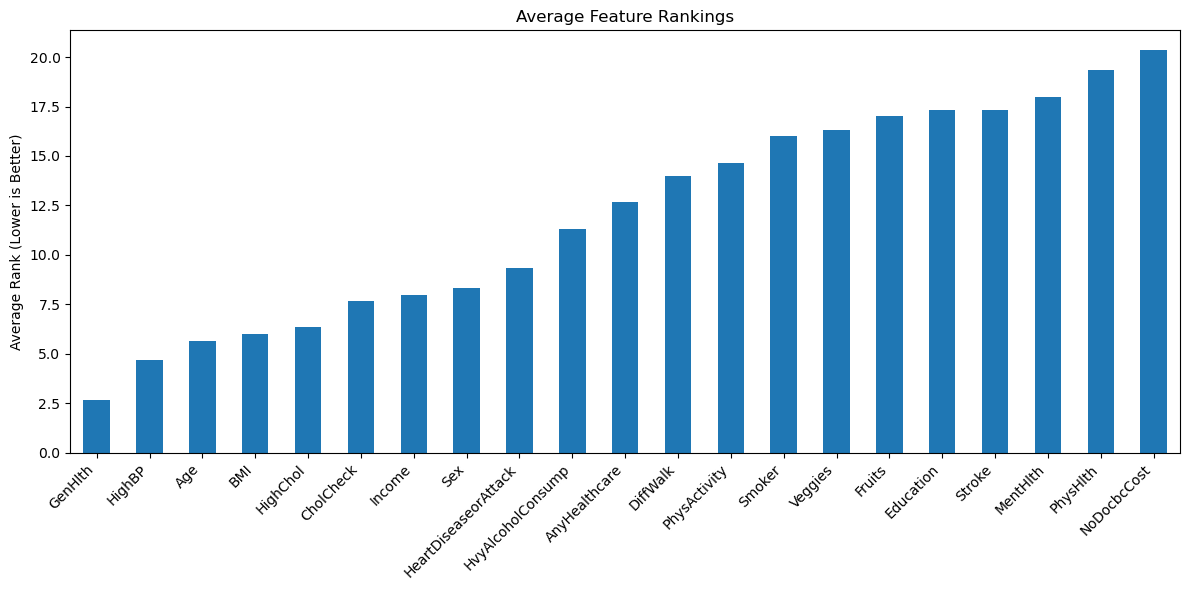

In [67]:
#Bar plot of average ranks
combined_rank['AverageRank'].plot(kind='bar', figsize=(12,6), title='Average Feature Rankings')
plt.ylabel('Average Rank (Lower is Better)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


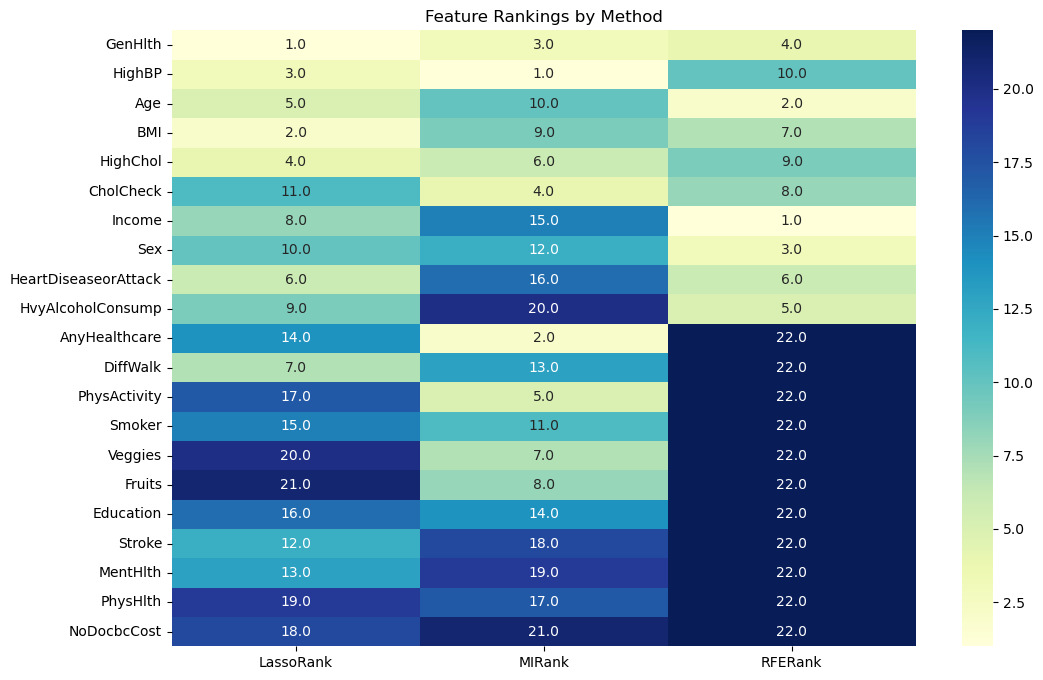

In [69]:

ordered_df = combined_rank.sort_values('AverageRank')

#Heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(ordered_df[['LassoRank', 'MIRank', 'RFERank']], annot=True, cmap='YlGnBu', fmt=".1f")
plt.title("Feature Rankings by Method")
plt.xticks(rotation=0)
plt.yticks(rotation=0)
plt.show()

In [71]:
#menually drop low imapacted feature
top_features = combined_rank.head(10).index.tolist()
X_selected = X[top_features]
X_selected

,GenHlth,HighBP,Age,BMI,HighChol,CholCheck,Income,Sex,HeartDiseaseorAttack,HvyAlcoholConsump
0,5.0,1.0,9.0,40.0,1.0,1.0,3.0,0.0,0.0,0.0
1,3.0,0.0,7.0,25.0,0.0,0.0,1.0,0.0,0.0,0.0
2,5.0,1.0,9.0,28.0,1.0,1.0,8.0,0.0,0.0,0.0
3,2.0,1.0,11.0,27.0,0.0,1.0,6.0,0.0,0.0,0.0
4,2.0,1.0,11.0,24.0,1.0,1.0,4.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
253675,3.0,1.0,5.0,45.0,1.0,1.0,7.0,1.0,0.0,0.0
253676,4.0,1.0,11.0,18.0,1.0,1.0,4.0,0.0,0.0,0.0
253677,1.0,0.0,2.0,28.0,0.0,1.0,2.0,0.0,0.0,0.0
253678,3.0,1.0,7.0,23.0,0.0,1.0,1.0,1.0,0.0,0.0


#Step 3: Balancing the Data using SMOTE
#before going to next step check it
print("Original class distribution:")
print(y.value_counts())



In [75]:
print(y.value_counts(normalize=True))

Diabetes_binary
0.0    0.847055
1.0    0.152945
Name: proportion, dtype: float64


In [79]:
#start step3 from here, with SMOTE
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)

In [81]:
#for x_selected
X_resampled, y_resampled = smote.fit_resample(X_selected, y)
#X_resampled, y_resampled = smote.fit_resample(X, y)

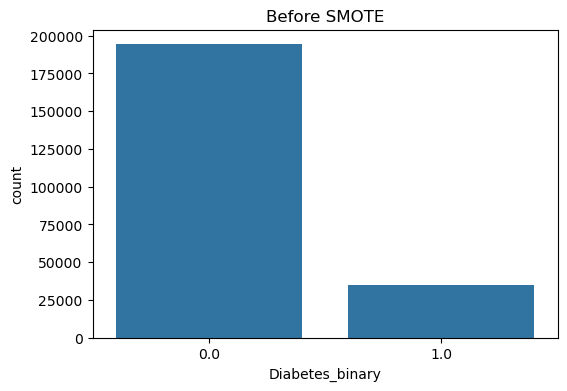

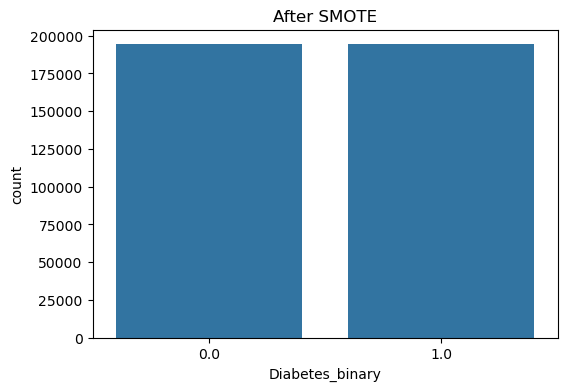

In [87]:
# Before SMOTE
plt.figure(figsize=(6,4))
sns.countplot(x=y)
plt.title("Before SMOTE")
plt.show()

# After SMOTE
plt.figure(figsize=(6,4))
sns.countplot(x=y_resampled)
plt.title("After SMOTE")
plt.show()

In [89]:
print(y_resampled.value_counts(normalize=True))

Diabetes_binary
0.0    0.5
1.0    0.5
Name: proportion, dtype: float64


In [95]:
#SMOTE + Tomek Links
from imblearn.combine import SMOTETomek
smote_tomek = SMOTETomek(random_state=42)
X_bal, y_bal = smote_tomek.fit_resample(X_selected, y)


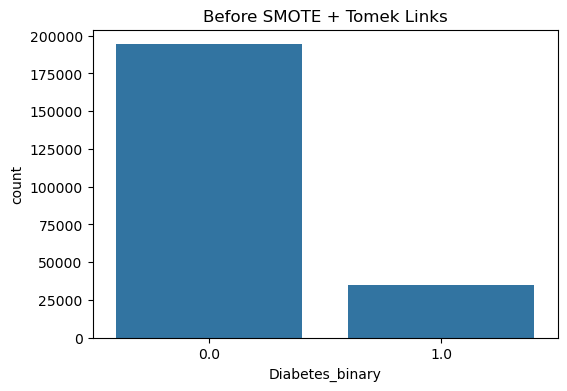

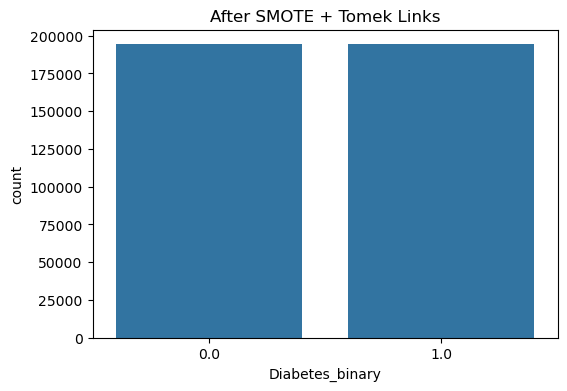

In [99]:
# Before SMOTE + Tomek Links
plt.figure(figsize=(6,4))
sns.countplot(x=y)
plt.title("Before SMOTE + Tomek Links")
plt.show()

# After SMOTE + Tomek Links
plt.figure(figsize=(6,4))
sns.countplot(x=y_bal)
plt.title("After SMOTE + Tomek Links")
plt.show()

In [101]:
#step4: Train / Test split

# Use SMOTE + Tomek Links balanced data
X_final = X_bal
y_final = y_bal


We’ll use train_test_split() with:80% for training and 20% for testing
stratify=y_final to preserve class balance

In [104]:
#train test, for testing it will be 20%
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_final, y_final, 
    test_size=0.2, 
    random_state=42,
    stratify=y_final
)

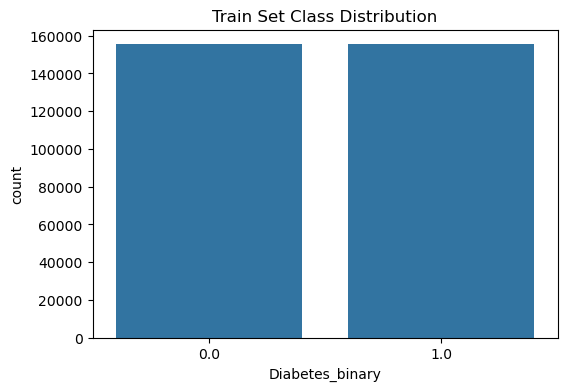

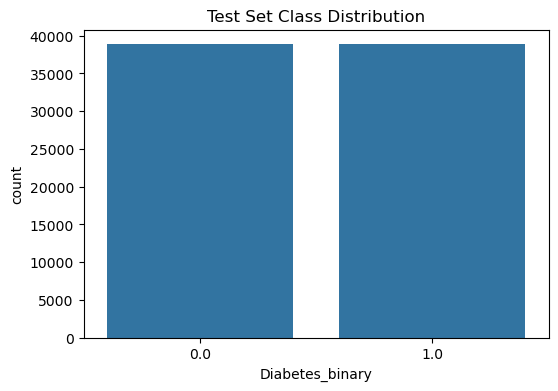

In [106]:
# Training set distribution
plt.figure(figsize=(6, 4))
sns.countplot(x=y_train)
plt.title("Train Set Class Distribution")
plt.show()

# Testing set distribution
plt.figure(figsize=(6, 4))
sns.countplot(x=y_test)
plt.title("Test Set Class Distribution")
plt.show()

In [108]:
print("Train set:\n", y_train.value_counts(normalize=True))
print("\nTest set:\n", y_test.value_counts(normalize=True))

Train set:
 Diabetes_binary
0.0    0.5
1.0    0.5
Name: proportion, dtype: float64

Test set:
 Diabetes_binary
1.0    0.5
0.0    0.5
Name: proportion, dtype: float64


In [112]:
print("Train set count:\n", y_train.value_counts())
print("\nTest set count:\n", y_test.value_counts())

Train set count:
 Diabetes_binary
0.0    155468
1.0    155468
Name: count, dtype: int64

Test set count:
 Diabetes_binary
1.0    38867
0.0    38867
Name: count, dtype: int64
